In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


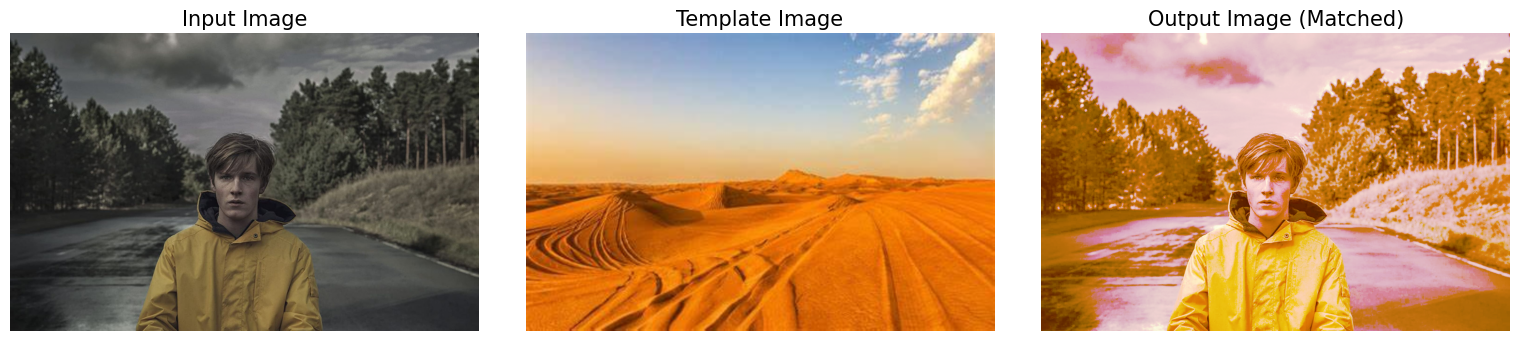

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.exposure import cumulative_distribution

def hist_matching(source, reference):
    matched = np.zeros_like(source)

    for i in range(3):
        src_hist, bins = np.histogram(source[..., i].ravel(), 256, [0, 256])
        ref_hist, _ = np.histogram(reference[..., i].ravel(), 256, [0, 256])

        src_cdf = np.cumsum(src_hist).astype(np.float32)
        ref_cdf = np.cumsum(ref_hist).astype(np.float32)

        src_cdf = src_cdf / src_cdf[-1]
        ref_cdf = ref_cdf / ref_cdf[-1]

        # Interpolasi nilai baru
        interp_map = np.interp(src_cdf, ref_cdf, np.arange(256))

        matched[..., i] = cv2.LUT(source[..., i], interp_map.astype(np.uint8))

    return matched

im = imread('/content/drive/MyDrive/images/jonas.jpg').astype(np.uint8)
im_t = imread('/content/drive/MyDrive/images/pasir.jpg').astype(np.uint8)

im_t = cv2.resize(im_t, (im.shape[1], im.shape[0]))

im1 = hist_matching(im, im_t)

plt.figure(figsize=(15, 10))
plt.subplots_adjust(left=0, top=0.95, right=1, bottom=0, wspace=0.1, hspace=0.1)

plt.subplot(131)
plt.imshow(im)
plt.axis('off')
plt.title('Input Image', fontsize=15)

plt.subplot(132)
plt.imshow(im_t)
plt.axis('off')
plt.title('Template Image', fontsize=15)

plt.subplot(133)
plt.imshow(im1)
plt.axis('off')
plt.title('Output Image (Matched)', fontsize=15)

plt.show()
